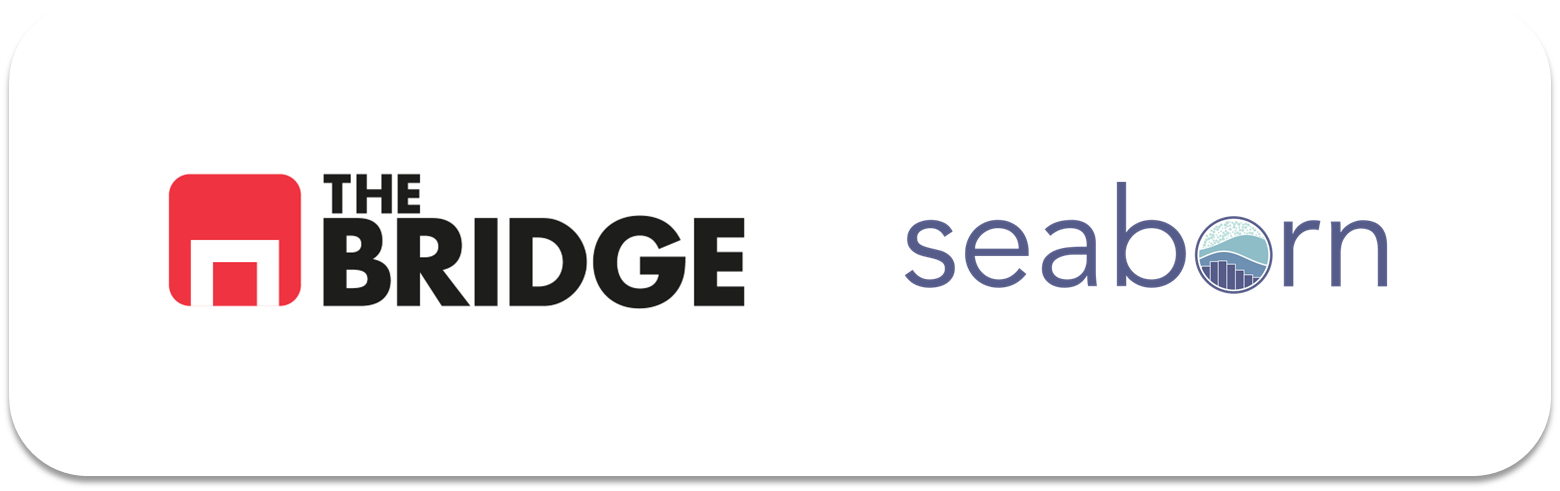

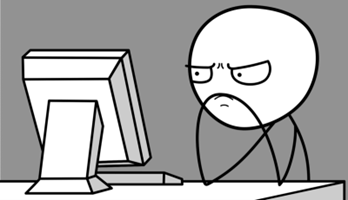

Para ejercitarte y afianzar lo aprendido sobre visualización de datos de variables columnas a la vez, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga los siguientes datasets que necesitarás para poder hacer el resto de ejercicios:
1. Titanic, "./data/titanic.csv"
2. Viajes, "./data/dataset_viajes_jun23"

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Ejercicio 2

Crea una función que tenga como argumentos un dataframe, el nombre de una columa categórica, el nombre de otra columna categórica y que haga lo siguiente:
1. Dibuje una combinación de gráficas con las frecuencias absolutas de cada columna categórica y una figura con el catplot de las dos columnas usando la segunda como valor para el argumento col. Utiliza countplot para las frecuencias y un subplots de 1 fila y dos columnas, añade una figura con catplot para la comparación. 
2. Devuelva la tabla de contigencia de las dos columnas.


In [27]:

def plot_absolute_categorical_relationship_and_contingency_table(df, col1, col2):
    '''
    This function takes a DataFrame and two categorical column names, then performs the following tasks:
    
    1. Draws a combination of graphs with the absolute frequencies of each categorical column using countplot.
    2. Creates a catplot with the second categorical column as the 'col' argument for comparison.
    3. Returns the contingency table of the two columns.
    
    Parameters:
    -----------
    df : pd.DataFrame
        The input DataFrame containing the data.
        
    col1 : str
        The name of the first categorical column.
    
    col2 : str
        The name of the second categorical column.
    
    Returns:
    --------
    pd.DataFrame: A contingency table showing the frequency distribution of the two categorical columns.
    
    Example:
    --------
    df = pd.DataFrame({
        'Category1': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
        'Category2': ['X', 'Y', 'X', 'Y', 'X', 'X', 'Y']
    })
    
    result = plot_and_contingency_table(df, 'Category1', 'Category2')
    print(result)
    '''
    fig, axs = plt.subplots(1, 2, figsize = (15, 5))
    
    # Countplot for the first categorical column
    sns.countplot(data = df, x = col1, ax = axs[0])
    axs[0].set_title(f'Count of {col1}')
    
    # Countplot for the second categorical column
    sns.countplot(data=df, x=col2, ax=axs[1])
    axs[1].set_title(f'Count of {col2}')
    
    plt.tight_layout()
    
    # Create a catplot for the comparison of the two columns
    catplot_fig = sns.catplot(data = df, x = col1, col = col2, kind = 'count')
    
    plt.show()
    
    # Generate the contingency table
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    return contingency_table


### Ejercicio 3

Aplicalo para comparar por un lado "alive" y "who" y "alive" y "class" del dataset del titanic.

#### Alive y who

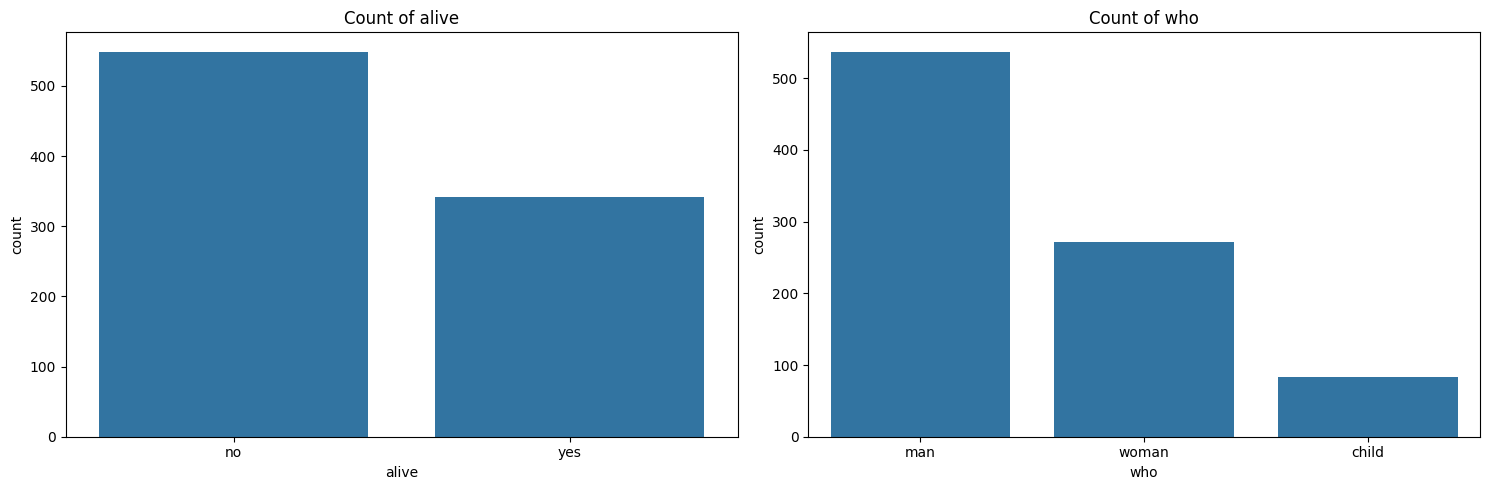

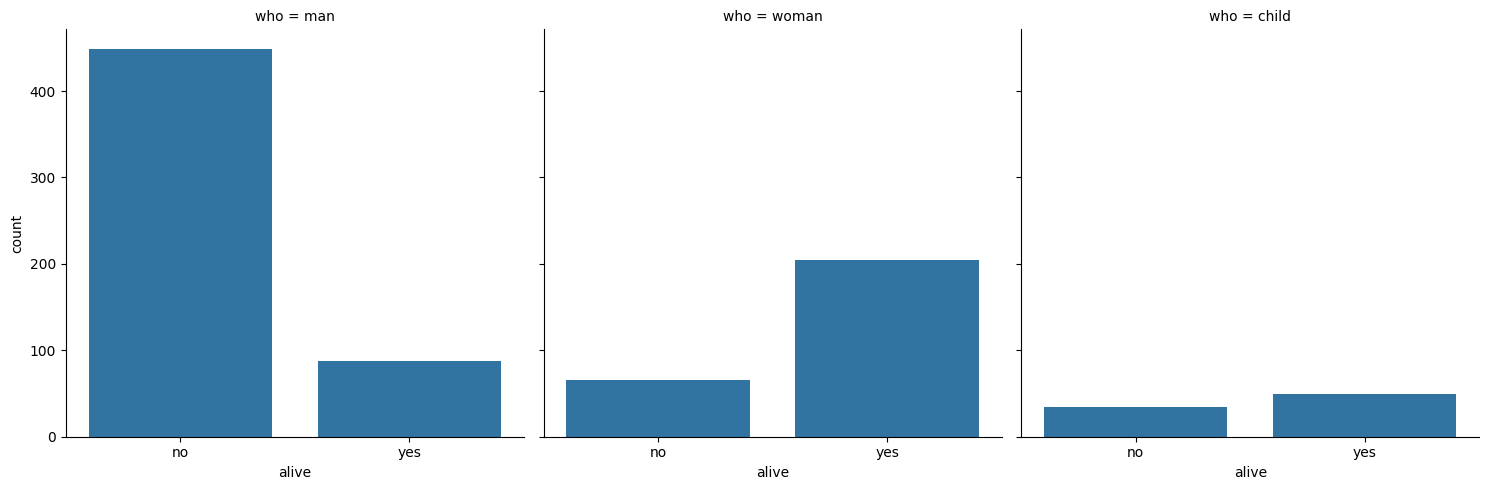

who,child,man,woman
alive,,,
no,34,449,66
yes,49,88,205


In [28]:
plot_absolute_categorical_relationship_and_contingency_table(df_titanic, 
                                                             'alive', 
                                                             'who')

#### Alive y Class

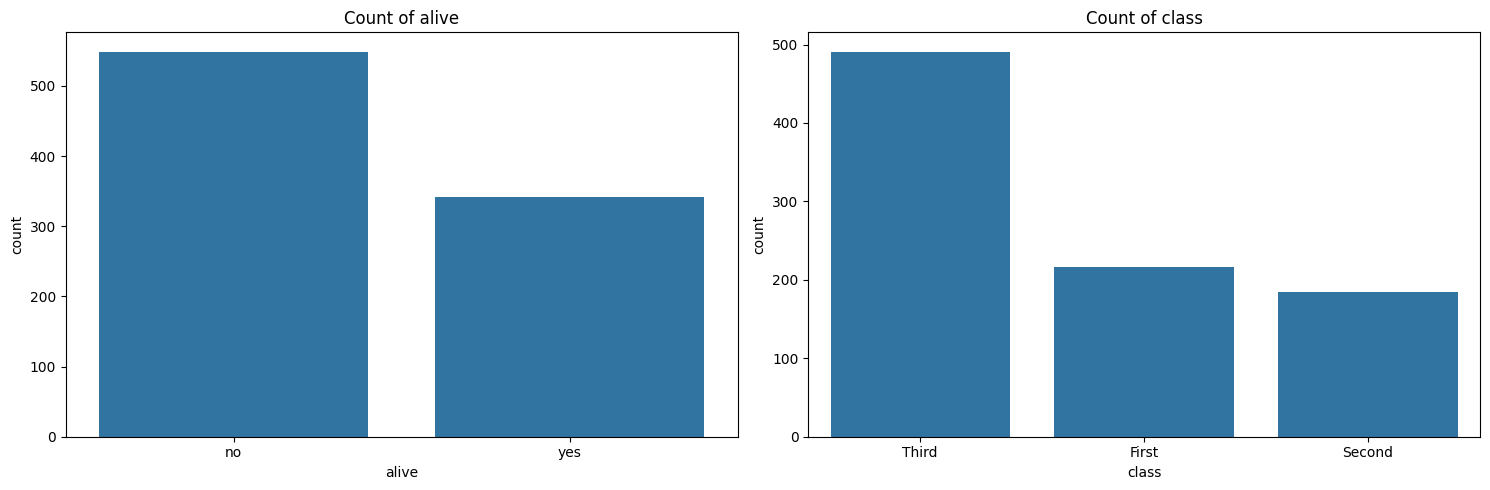

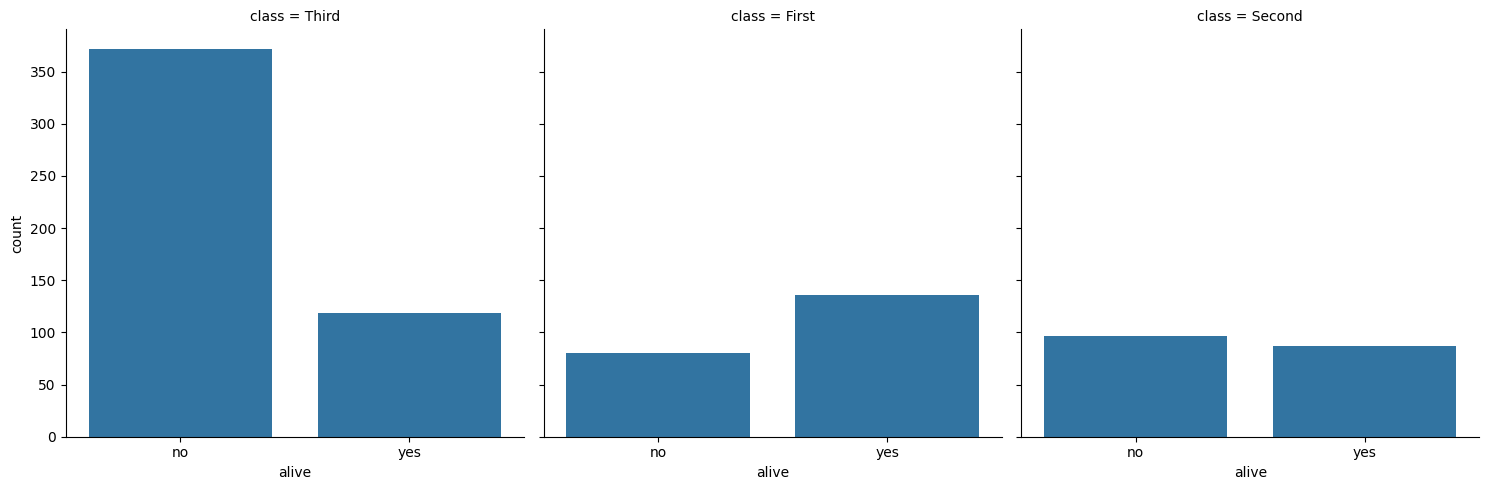

class,First,Second,Third
alive,,,
no,80,97,372
yes,136,87,119


In [29]:
plot_absolute_categorical_relationship_and_contingency_table(df_titanic, 
                                                             'alive', 
                                                             'class')

### Ejercicio 4

Crea una función que compare ahora una variable categórica y otra numérica. Para ello, se aconseja reutilizar código de las funciones que viste en el grupo anterior de ejercicios para pintar histogramas, crea una función que haga lo siguiente:
1. Admita tres parámetros o argumentos: Un dataframe, el nombre de una columna categórica del mismo, el nombre de una columna numérica del mismo.
2. Cree una matriz de gráficos, tantas como valores de la variable categórica, con un máximo de tres columnas por fila y todas las filas que necesite.
3. Asigne a cada gráfica el histograma de la variable numérica pero sólo para las filas que tengan el valor que corresponda de la variable categórica (así si el primer valor de la categórica es Val1 y la variable numérica se llama Num1, en la primera gráfica estará el histograma de Num1 sólo para las filas que tengan Val1)
4. Añada el título "Histograma de {variable numerica} para el valor {valor correspondiente de la categórica} a cada gráfica.

In [39]:

def plot_histograms_by_categorical_numerical_relationship(df, cat_column, num_column):
    '''
    Generate a grid of histograms to compare a categorical variable with a numerical variable.
    
    Parameters:
    -----------
    df : pd.DataFrame
        The input DataFrame containing the data.
        
    cat_column : str
        The name of the categorical column in the DataFrame.
    
    num_column : str
        The name of the numerical column in the DataFrame.
    
    Returns:
    --------
    None (displays plots)
    
    Example:
    --------
    df = pd.DataFrame({
        'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C'],
        'Numeric': [10, 15, 8, 12, 9, 11, 13]
    })
    
    plot_categorical_numerical_relationship(df, 'Category', 'Numeric')
    '''
    # Get unique categories in the categorical column
    categories = df[cat_column].unique()
    num_categories = len(categories)
    
    # Calculate number of rows and columns for subplot grid
    num_rows = (num_categories + 2) // 3  # Ensure at least one row
    num_cols = min(num_categories, 3)
    
    # Create a grid of subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
    
    # Flatten the axis array if there's only one row or one column
    if num_rows == 1 and num_cols == 1:
        axs = np.array([axs])
    elif num_rows == 1:
        axs = axs.reshape(1, -1)
    elif num_cols == 1:
        axs = axs.reshape(-1, 1)
    
    # Iterate through each category and plot corresponding histograms
    for i, category in enumerate(categories):
        row = i // num_cols
        col = i % num_cols
        
        # Filter DataFrame rows based on category
        data_subset = df[df[cat_column] == category]
        
        # Plot histogram for the numerical column
        sns.histplot(data=data_subset, x=num_column, ax=axs[row, col])
        axs[row, col].set_title(f'Histogram of {num_column} for {cat_column} = {category}')
        axs[row, col].set_xlabel(num_column)
        axs[row, col].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


### Ejercicio 5

Aplica la función anterior para ver los histogramas de "ingresos" y "consumo_kg" por compañía aérea del dataset de viajes. ¿Qué argumentos añadirías a la función para poder generar mejores visualizaciones?

#### Aircompany e Ingresos

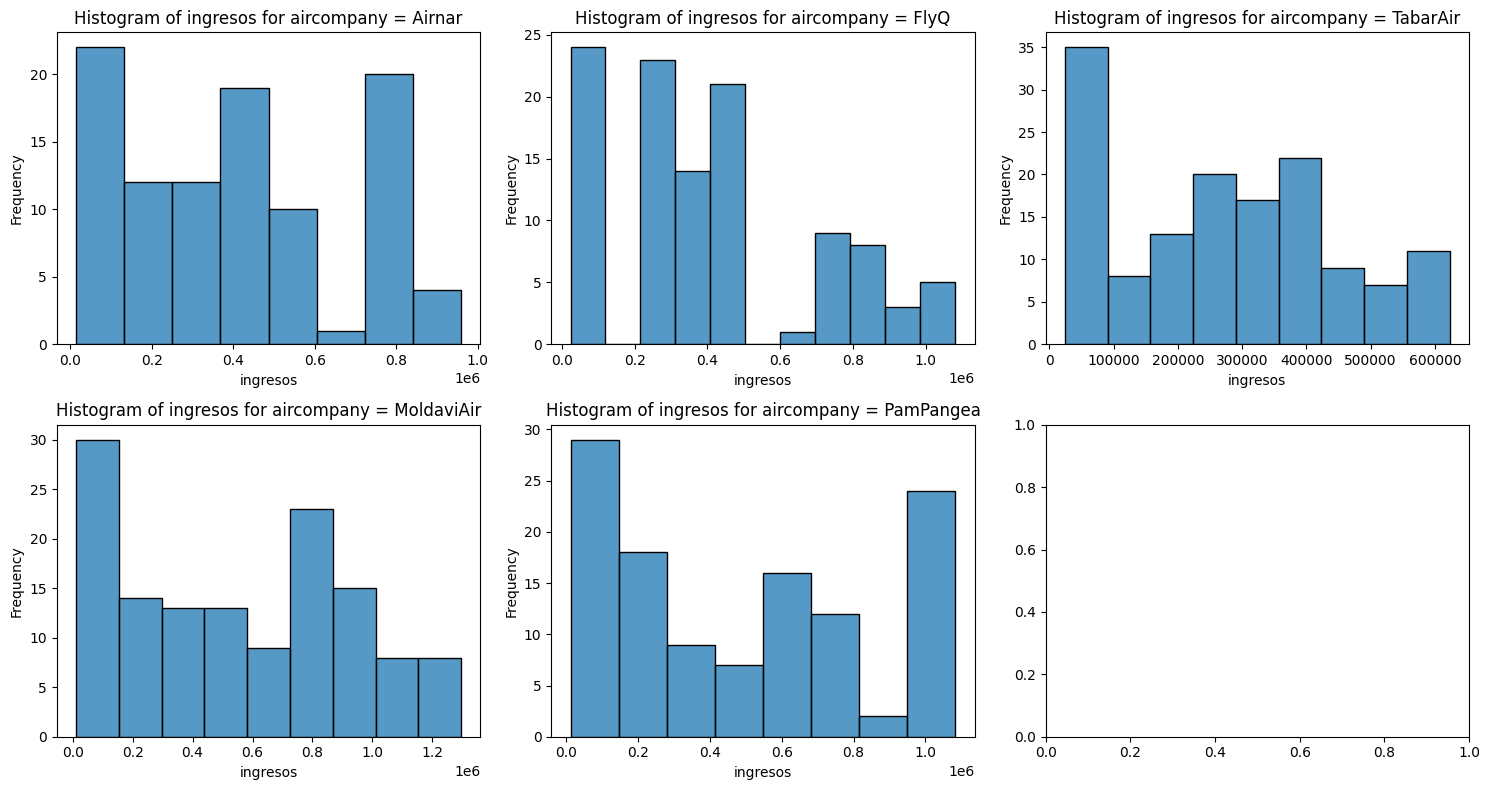

In [40]:
plot_histograms_by_categorical_numerical_relationship(df_viajes, 'aircompany', 'ingresos')

#### Aircompany y Consumo_kg

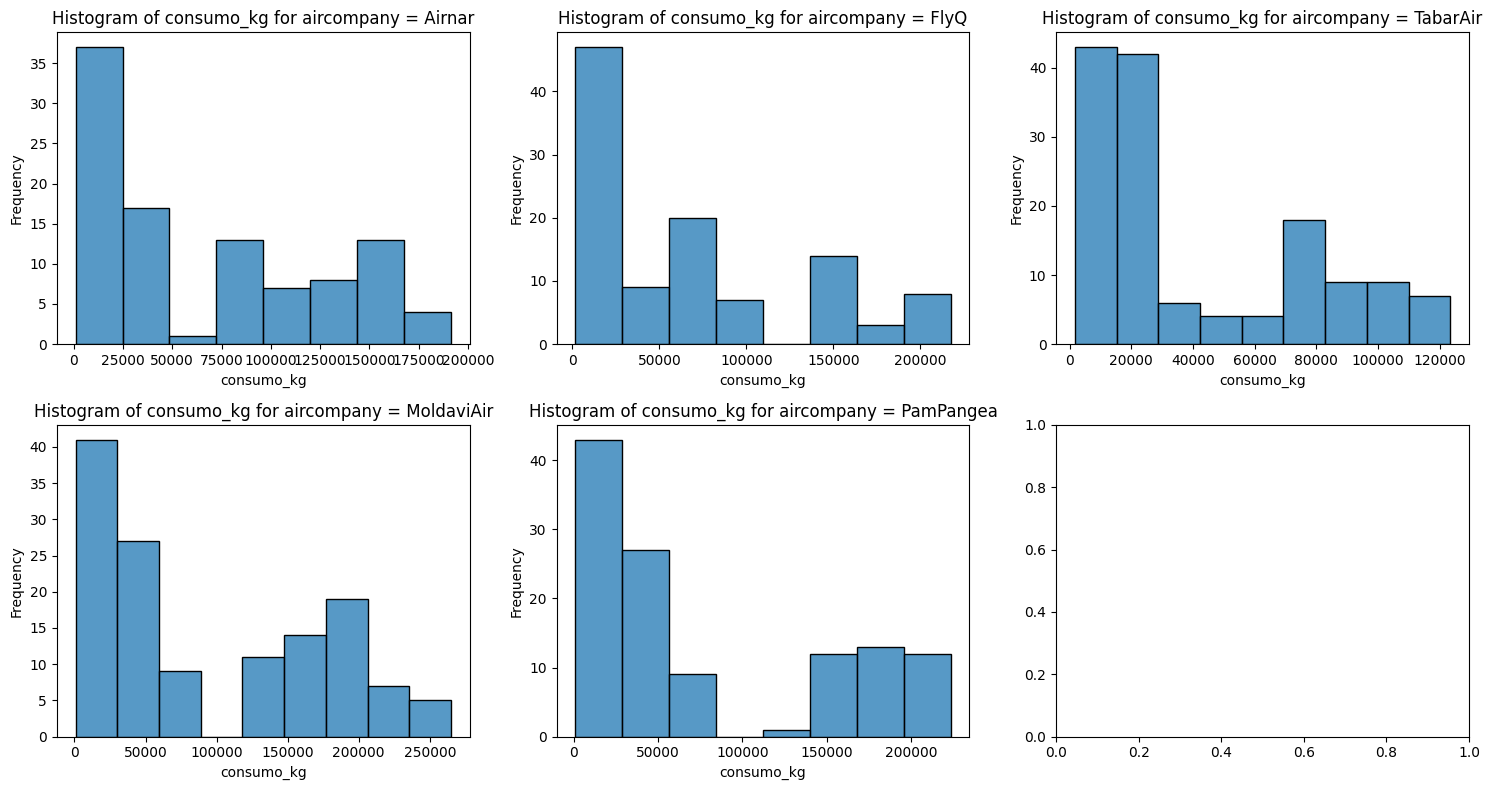

In [43]:
plot_histograms_by_categorical_numerical_relationship(df_viajes, 'aircompany', 'consumo_kg')

In [ ]:
# Mejoras:
# - Que aparezcan los valores, con un show_values()
# - Que aparezca el KDE

### Ejercicio 6

Crea una función para pintar diagramas de dispersion que tenga cinco argumentos:
1. Un dataframe
2. Una columna numérica del dataframe
3. Una columna numérica del dataframe diferente a la anterior.
4. Un columna categórica (Opcional, valor por defecto None)
5. Un valor para el tamaño de los puntos.

La función debe pintar el diagrama de dispersión de la columna numérica 1, en el eje X, frente a la columna numérica 2, en el eje Y, usando un código de colores en función de la columna categórica y con el tamaño de los puntos según el argumento correspondiente. 

Si no se diera una columna categórica como argumento, el color no debe pasarse como parámetro a la función de Seaborn que uses. [Nota: como en todos los ejercicios anteriores, debes usar Seaborn para pintar]

In [46]:

def plot_scatter_with_category(df, num_column1, num_column2, cat_column=None, point_size=50):
    '''
    Generate a scatter plot of num_column1 vs num_column2 with optional color coding by a categorical column.
    
    Parameters:
    -----------
    df : pd.DataFrame
        The input DataFrame containing the data.
        
    num_column1 : str
        The name of the first numerical column for the x-axis.
    
    num_column2 : str
        The name of the second numerical column for the y-axis.
    
    cat_column : str or None, optional (default=None)
        The name of the categorical column for color coding. If None, points will not be colored based on category.
    
    point_size : int, optional (default=50)
        The size of the points in the scatter plot.
    
    Returns:
    --------
    None (displays plot)
    
    Example:
    --------
    df = pd.DataFrame({
        'X': [1, 2, 3, 4, 5],
        'Y': [5, 4, 3, 2, 1],
        'Category': ['A', 'B', 'A', 'B', 'A']
    })
    
    scatterplot_with_category(df, 'X', 'Y', 'Category', point_size=100)
    '''
    plt.figure(figsize=(10, 6))
    
    if cat_column:
        sns.scatterplot(data=df, x=num_column1, y=num_column2, hue=cat_column, s=point_size)
    else:
        sns.scatterplot(data=df, x=num_column1, y=num_column2, s=point_size)
    
    plt.title(f'Scatter plot of {num_column1} vs {num_column2}')
    plt.xlabel(num_column1)
    plt.ylabel(num_column2)
    plt.legend(title=cat_column)
    plt.grid(True)
    plt.show()


### Ejercicio 7

Usa la función del ejercicio anterior para pintar la comparativa entre ingresos, consumo_kg y compañía aérea. ¿Si quisieras usarla como visualización que quitarías, añadirías o remarcarías?

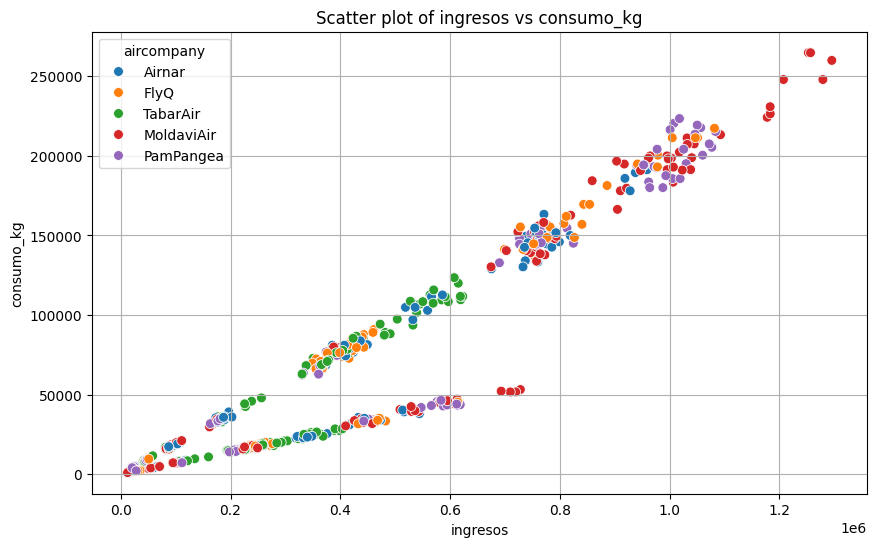

In [47]:
plot_scatter_with_category(df_viajes, 'ingresos', 'consumo_kg', 'aircompany', point_size=50)

C:\Users\Lander\AppData\Local\Temp\ipykernel_14772\2059382442.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=cat_column)


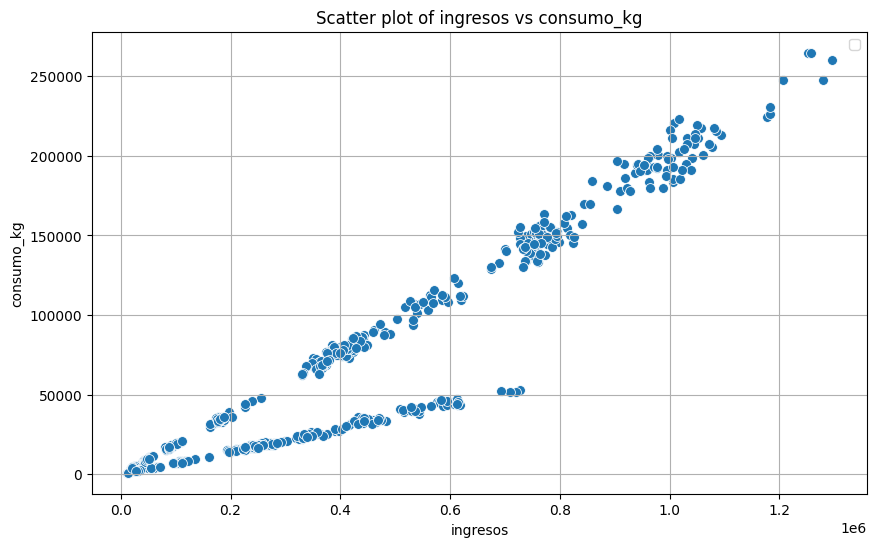

In [48]:
plot_scatter_with_category(df_viajes, 'ingresos', 'consumo_kg', point_size=50)

### Ejercicio 8

Usa la función del ejercicio 6 para pintar la comparativa entre distancia, duración e ingresos. ¿Si quisieras usarla como visualización que quitarías, añadírías o remarcarías?

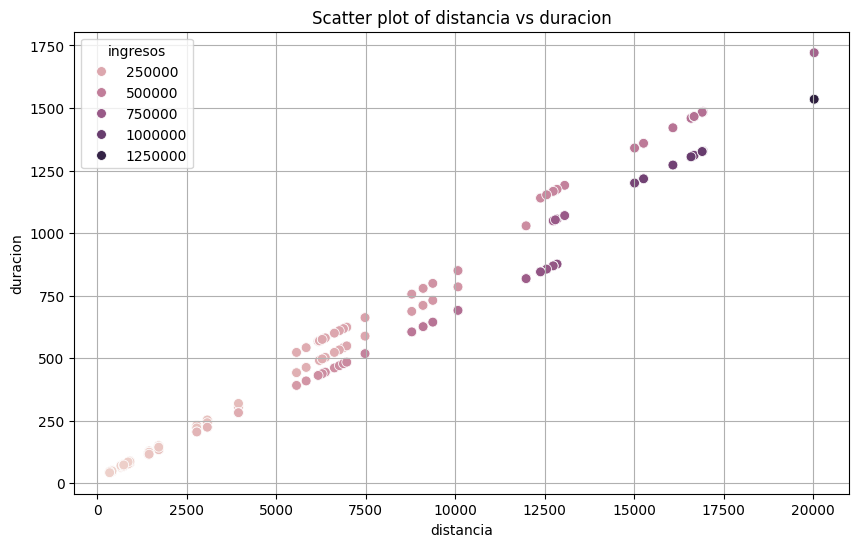

In [49]:
plot_scatter_with_category(df_viajes, 'distancia', 'duracion', 'ingresos', point_size=50)

In [50]:
df_viajes.ingresos.value_counts()

ingresos
14232.65     1
24178.48     1
997458.26    1
794055.41    1
782115.96    1
            ..
100056.73    1
858894.20    1
108115.02    1
443739.94    1
330320.81    1
Name: count, Length: 600, dtype: int64

In [ ]:
# MEJORAS:
#     - ¿Ha agrupado directamente los ingresos en 5 categorías? En tal caso,
#       no se me ocurre nada más
#
#
